Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [9]:
data = pd.read_pickle("survey_transformed_2019_agegroups.pkl")

In [10]:
data.reset_index(drop=True, inplace=True)

In [11]:
data.head()

,Would_live_in_another_neighborhood,District,Woman,Car,Support_with_housework,Owner,House_size,No_of_people_in_the_house,Financial_situation,Disability,...,SUBWAY,MUNICIPAL MARKETS,CITIZEN SECURITY IN THE CITY AS A WHOLE,CITY MANAGEMENT,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,0.0,SANTS - MONTJUÏC,0,0.0,0.0,0.0,51-100 M2,THREE OR MORE,BAD,0.0,...,1.0,1.0,0.0,0.0,0,0,0,0,0,0
1,0.0,SANTS - MONTJUÏC,0,1.0,0.0,1.0,51-100 M2,TWO,GOOD,0.0,...,1.0,1.0,0.0,1.0,0,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,0,1.0,0.0,0.0,101-150 M2,TWO,GOOD,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
3,0.0,SANTS - MONTJUÏC,0,1.0,0.0,1.0,51-100 M2,THREE OR MORE,GOOD,0.0,...,1.0,1.0,1.0,1.0,1,0,0,0,0,0
4,1.0,SANTS - MONTJUÏC,1,0.0,0.0,0.0,I DON'T KNOW,THREE OR MORE,GOOD,0.0,...,0.0,1.0,1.0,1.0,0,0,0,0,0,0


In [12]:
data.shape

(4388, 49)

In [13]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_live_in_another_neighborhood))

Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,3394,0
1.0,0,994


Would_live_in_another_neighborhood,0.0,1.0
District,,
CIUTAT VELLA,316,145
EIXAMPLE,579,124
GRÀCIA,276,57
HORTA - GUINARDÓ,330,117
LES CORTS,281,40
NOU BARRIS,292,127
SANT ANDREU,248,96
SANT MARTÍ,435,133
SANTS - MONTJUÏC,319,116


Would_live_in_another_neighborhood,0.0,1.0
Woman,,
0,1575,447
1,1819,547


Would_live_in_another_neighborhood,0.0,1.0
Car,,
0.0,1541,478
1.0,1853,516


Would_live_in_another_neighborhood,0.0,1.0
Support_with_housework,,
0.0,2499,777
1.0,895,217


Would_live_in_another_neighborhood,0.0,1.0
Owner,,
0.0,1519,551
1.0,1875,443


Would_live_in_another_neighborhood,0.0,1.0
House_size,,
101-150 M2,402,83
51-100 M2,2323,694
< 50 M2,285,133
> 150 M2,93,13
I DON'T KNOW,291,71


Would_live_in_another_neighborhood,0.0,1.0
No_of_people_in_the_house,,
ONE,631,151
THREE OR MORE,1523,478
TWO,1240,365


Would_live_in_another_neighborhood,0.0,1.0
Financial_situation,,
BAD,1389,456
GOOD,2005,538


Would_live_in_another_neighborhood,0.0,1.0
Disability,,
0.0,3071,918
1.0,323,76


Would_live_in_another_neighborhood,0.0,1.0
Living_with_disabled_person,,
0,2766,839
1,628,155


Would_live_in_another_neighborhood,0.0,1.0
Time_living_in_barri,,
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,513,104
LESS THAN 10 YEARS,1225,555
MORE THAN 10 YEARS,1656,335


Would_live_in_another_neighborhood,0.0,1.0
Barri_evolution,,
IT HAS IMPROVED,1583,387
IT HAS WORSENED,717,305
IT IS THE SAME,1094,302


Would_live_in_another_neighborhood,0.0,1.0
BCN_evolution,,
IT HAS IMPROVED,1162,346
IT HAS WORSENED,1440,437
IT IS THE SAME,792,211


Would_live_in_another_neighborhood,0.0,1.0
Barri_future,,
IT WILL IMPROVE,2277,638
IT WILL STAY THE SAME,640,153
IT WILL WORSEN,477,203


Would_live_in_another_neighborhood,0.0,1.0
BCN_future,,
IT WILL IMPROVE,2214,664
IT WILL STAY THE SAME,556,120
IT WILL WORSEN,624,210


Would_live_in_another_neighborhood,0.0,1.0
Barri_satisfaction,,
FAIRLY SATISFIED,201,226
NOT SATISFIED,13,37
SATISFIED,3180,731


Would_live_in_another_neighborhood,0.0,1.0
BCN_satisfaction,,
FAIRLY SATISFIED,402,149
NOT SATISFIED,28,15
SATISFIED,2964,830


Would_live_in_another_neighborhood,0.0,1.0
Barri_security,,
BAD,448,176
GOOD,1729,422
"NEITHER BAD, NOR GOOD",1217,396


Would_live_in_another_neighborhood,0.0,1.0
BCN_security,,
BAD,547,172
GOOD,1286,370
"NEITHER BAD, NOR GOOD",1561,452


Would_live_in_another_neighborhood,0.0,1.0
Barri_management,,
BAD,184,77
GOOD,1997,458
"NEITHER BAD, NOR GOOD",1213,459


Would_live_in_another_neighborhood,0.0,1.0
BCN_management,,
BAD,261,68
GOOD,1751,510
"NEITHER BAD, NOR GOOD",1382,416


Would_live_in_another_neighborhood,0.0,1.0
Barri_comparison,,
"NEITHER THE BEST, NOR THE WORST",878,450
ONE OF THE BEST,2424,366
ONE OF THE WORST,92,178


Would_live_in_another_neighborhood,0.0,1.0
Barri_association,,
0.0,2886,898
1.0,508,96


Would_live_in_another_neighborhood,0.0,1.0
Barri_transport,,
BAD,441,168
GOOD,2771,758
"NEITHER BAD, NOR GOOD",182,68


Would_live_in_another_neighborhood,0.0,1.0
BCN_transport,,
BAD,255,70
GOOD,2932,885
"NEITHER BAD, NOR GOOD",207,39


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_security,,
0,2776,784
1,618,210


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_streets_cleaning,,
0,3123,906
1,271,88


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_mobility,,
0,3239,943
1,155,51


Would_live_in_another_neighborhood,0.0,1.0
Age_group,,
65 YEARS AND OVER,1013,155
FROM 18 TO 24 YEARS,239,117
FROM 25 TO 34 YEARS,505,259
FROM 35 TO 44 YEARS,625,202
FROM 45 TO 54 YEARS,542,160
FROM 55 TO 64 YEARS,470,101


Would_live_in_another_neighborhood,0.0,1.0
Residential_satisfaction,,
0,430,164
1,2964,830


Would_live_in_another_neighborhood,0.0,1.0
GARBAGE COLLECTION,,
0.0,769,250
1.0,2625,744


Would_live_in_another_neighborhood,0.0,1.0
STREETS CLEANING,,
0.0,1347,402
1.0,2047,592


Would_live_in_another_neighborhood,0.0,1.0
NOISE,,
0.0,1890,574
1.0,1504,420


Would_live_in_another_neighborhood,0.0,1.0
GREEN AREAS,,
0.0,1466,429
1.0,1928,565


Would_live_in_another_neighborhood,0.0,1.0
PUBLIC LIGHTING,,
0.0,1082,339
1.0,2312,655


Would_live_in_another_neighborhood,0.0,1.0
ASPHALT AND STREET CONSERVATION,,
0.0,1532,443
1.0,1862,551


Would_live_in_another_neighborhood,0.0,1.0
CIRCULATION AND TRAFFIC,,
0.0,2190,637
1.0,1204,357


Would_live_in_another_neighborhood,0.0,1.0
BUS,,
0.0,1031,302
1.0,2363,692


Would_live_in_another_neighborhood,0.0,1.0
SUBWAY,,
0.0,896,295
1.0,2498,699


Would_live_in_another_neighborhood,0.0,1.0
MUNICIPAL MARKETS,,
0.0,956,307
1.0,2438,687


Would_live_in_another_neighborhood,0.0,1.0
CITIZEN SECURITY IN THE CITY AS A WHOLE,,
0.0,2108,624
1.0,1286,370


Would_live_in_another_neighborhood,0.0,1.0
CITY MANAGEMENT,,
0.0,1643,484
1.0,1751,510


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_evolution,,
0,3034,853
1,360,141


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_future,,
0,2964,839
1,430,155


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_satisfaction,,
0,3269,807
1,125,187


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_transport,,
0,3096,870
1,298,124


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_management,,
0,3299,946
1,95,48


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_security,,
0,3257,937
1,137,57


In [14]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'House_size',
 'No_of_people_in_the_house',
 'Financial_situation',
 'Disability',
 'Living_with_disabled_person',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'Age_group',
 'Residential_satisfaction',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'SUBWAY',
 'MUNICIPAL MARKETS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITY MANAGEMENT',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_sat

In [15]:
x_var = ['District', # neighbourhood & city
 'Woman', # gender
 'Age_group', # age group
 'Car', # support / health
 'Support_with_housework', # support
 'Owner', # housing
 'House_size', # housing
 'No_of_people_in_the_house', # housing
 'Financial_situation', # financial situation
 'Disability', # health
 'Living_with_disabled_person', # health
 'Time_living_in_barri', # attachment
 'Barri_evolution', # neighbourhood & city
 'Barri_future', # neighbourhood & city
 'Barri_satisfaction', # neighbourhood & city
 'Barri_security', # neighbourhood & city
 'Barri_management', # neighbourhood & city
 'Barri_comparison', # neighbourhood & city
 'Barri_association', # neighbourhood & city
 'Barri_transport', # neighbourhood & city
 'BCN_over_barri_evolution', # neighbourhood & city
 'BCN_over_barri_future', # neighbourhood & city
 'BCN_over_barri_satisfaction', # neighbourhood & city
 'BCN_over_barri_transport', # neighbourhood & city
 'BCN_over_barri_management', # neighbourhood & city
 'BCN_over_barri_security'] # neighbourhood & city

In [16]:
y = data['Would_live_in_another_neighborhood']

In [17]:
x = pd.get_dummies(data[x_var])

In [18]:
x.columns.tolist()

['Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'Disability',
 'Living_with_disabled_person',
 'Barri_association',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security',
 'District_CIUTAT VELLA',
 'District_EIXAMPLE',
 'District_GRÀCIA',
 'District_HORTA - GUINARDÓ',
 'District_LES CORTS',
 'District_NOU BARRIS',
 'District_SANT ANDREU',
 'District_SANT MARTÍ',
 'District_SANTS - MONTJUÏC',
 'District_SARRIÀ - SANT GERVASI',
 'Age_group_65 YEARS AND OVER',
 'Age_group_FROM 18 TO 24 YEARS',
 'Age_group_FROM 25 TO 34 YEARS',
 'Age_group_FROM 35 TO 44 YEARS',
 'Age_group_FROM 45 TO 54 YEARS',
 'Age_group_FROM 55 TO 64 YEARS',
 'House_size_101-150 M2',
 'House_size_51-100 M2',
 'House_size_< 50 M2',
 'House_size_> 150 M2',
 "House_size_I DON'T KNOW",
 'No_of_people_in_the_house_ONE',
 'No_of_people_in_the_house_THREE OR MORE',
 'No_of_people_in_the_house_TWO',
 'F

In [19]:
for i in ['District_EIXAMPLE',
          'Age_group_FROM 18 TO 24 YEARS',
          'House_size_< 50 M2',
          'No_of_people_in_the_house_ONE',
          'Financial_situation_GOOD',
          'Time_living_in_barri_LESS THAN 10 YEARS',
          'Barri_evolution_IT HAS IMPROVED',
          'Barri_future_IT WILL IMPROVE',
          'Barri_satisfaction_SATISFIED',
          'Barri_security_GOOD',
          'Barri_management_GOOD',
          'Barri_comparison_ONE OF THE BEST',
          'Barri_transport_GOOD']:
    del x[i]

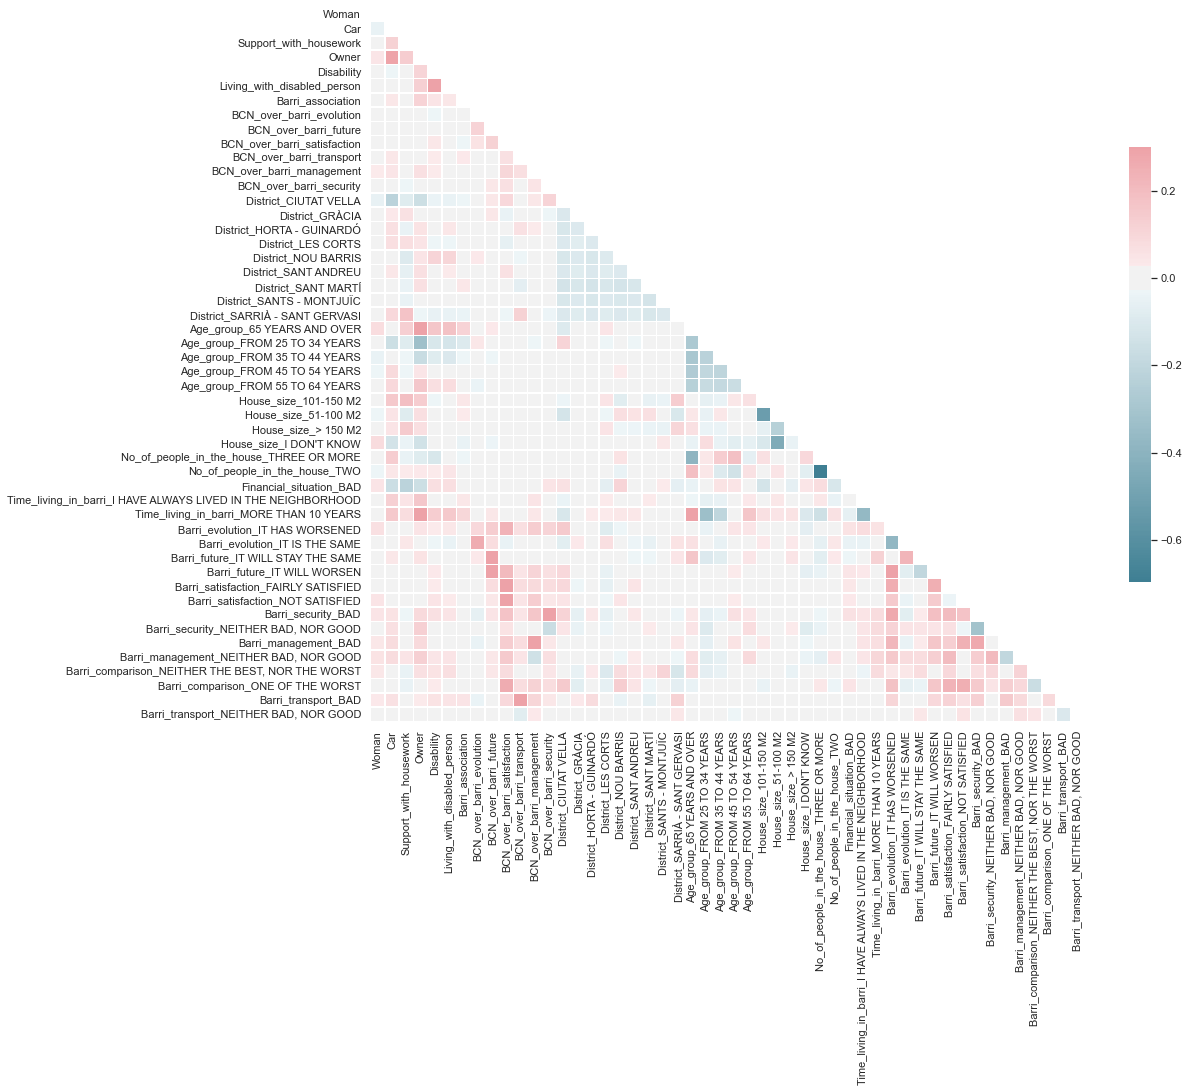

In [20]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = x.corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, #annot = corr.round(2), 
            linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
x = sm.add_constant(x)

# Models

In [22]:
sm.families.family.Binomial.links

[statsmodels.genmod.families.links.logit,
 statsmodels.genmod.families.links.probit,
 statsmodels.genmod.families.links.cauchy,
 statsmodels.genmod.families.links.log,
 statsmodels.genmod.families.links.cloglog,
 statsmodels.genmod.families.links.identity]

# Logit

In [23]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4337
Model Family:                                Binomial   Df Model:                           50
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1893.5
Date:                                Mon, 10 May 2021   Deviance:                       3787.1
Time:                                        21:16:16   Pearson chi2:                 4.42e+03
No. Iterations:                                     5                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.9594      0.239     -4.018      0.000      -1.427      -0.491
Woman                                                            0.0939      0.084      1.119      0.263      -0.071       0.258
Car                                                              0.1068      0.094      1.134      0.257      -0.078       0.291
Support_with_housework                                           0.1745      0.106      1.654      0.098      -0.032       0.381
Owner                                                            0.0236      0.106      0.222      0.824      -0.184       0.232
Disability                                                      -0.1607      0.211     -0.763      0.445      -0.573       0.252
Living_with_disabled_person                                     -0.0751      0.155     -0.486      0.627      -0.378       0.228
Barri_association                                               -0.2848      0.132     -2.151      0.031      -0.544      -0.025
BCN_over_barri_evolution                                         0.1922      0.135      1.422      0.155      -0.073       0.457
BCN_over_barri_future                                            0.2952      0.150      1.971      0.049       0.002       0.589
BCN_over_barri_satisfaction                                      0.2351      0.228      1.029      0.303      -0.213       0.683
BCN_over_barri_transport                                         0.1244      0.238      0.522      0.601      -0.342       0.591
BCN_over_barri_management                                        0.4096      0.344      1.190      0.234      -0.265       1.085
BCN_over_barri_security                                          0.0865      0.234      0.370      0.712      -0.372       0.545
District_CIUTAT VELLA                                           -0.0903      0.171     -0.530      0.596      -0.425       0.244
District_GRÀCIA                                                 -0.0099      0.191     -0.052      0.959      -0.384       0.364
District_HORTA - GUINARDÓ                                        0.3076      0.168      1.833      0.067      -0.021       0.636
District_LES CORTS                                              -0.1394      0.211     -0.660      0.509      -0.553       0.275
District_NOU BARRIS                                              0.2293      0.174      1.318      0.188      -0.112       0.570
District_SANT ANDREU                                             0.22

In [24]:
glm_logit_results.aic

3889.0877573641055

In [25]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-32585.721441026537

In [26]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_transport_BAD                                             9.599696e-01
District_GRÀCIA                                                 9.586555e-01
Barri_security_NEITHER BAD, NOR GOOD                            8.781167e-01
Owner                                                           8.243052e-01
No_of_people_in_the_house_TWO                                   8.183758e-01
Barri_management_BAD                                            7.860915e-01
Barri_evolution_IT IS THE SAME                                  7.331891e-01
BCN_over_barri_security                                         7.116234e-01
Barri_transport_NEITHER BAD, NOR GOOD                           6.604995e-01
Living_with_disabled_person                                     6.270320e-01
BCN_over_barri_transport                                        6.013238e-01
District_CIUTAT VELLA                                           5.963728e-01
District_LES CORTS                                              5.094804e-01

In [27]:
for i in x.columns.tolist():
    if i[:8] == 'District':
        del x[i]

In [28]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4346
Model Family:                                Binomial   Df Model:                           41
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1903.1
Date:                                Mon, 10 May 2021   Deviance:                       3806.1
Time:                                        21:25:46   Pearson chi2:                 4.39e+03
No. Iterations:                                     5                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.9951      0.218     -4.570      0.000      -1.422      -0.568
Woman                                                            0.0924      0.083      1.108      0.268      -0.071       0.256
Car                                                              0.1181      0.092      1.282      0.200      -0.062       0.299
Support_with_housework                                           0.0970      0.103      0.938      0.348      -0.106       0.300
Owner                                                            0.0818      0.104      0.783      0.433      -0.123       0.286
Disability                                                      -0.1353      0.209     -0.648      0.517      -0.545       0.274
Living_with_disabled_person                                     -0.0494      0.154     -0.321      0.748      -0.350       0.252
Barri_association                                               -0.2664      0.132     -2.016      0.044      -0.525      -0.007
BCN_over_barri_evolution                                         0.2206      0.134      1.642      0.101      -0.043       0.484
BCN_over_barri_future                                            0.2806      0.149      1.884      0.060      -0.011       0.573
BCN_over_barri_satisfaction                                      0.2694      0.227      1.188      0.235      -0.175       0.714
BCN_over_barri_transport                                         0.0851      0.236      0.360      0.719      -0.378       0.548
BCN_over_barri_management                                        0.4767      0.344      1.384      0.166      -0.198       1.151
BCN_over_barri_security                                          0.0609      0.233      0.261      0.794      -0.396       0.518
Age_group_65 YEARS AND OVER                                     -1.3436      0.196     -6.855      0.000      -1.728      -0.959
Age_group_FROM 25 TO 34 YEARS                                   -0.2132      0.160     -1.334      0.182      -0.526       0.100
Age_group_FROM 35 TO 44 YEARS                                   -0.7356      0.164     -4.486      0.000      -1.057      -0.414
Age_group_FROM 45 TO 54 YEARS                                   -0.7604      0.174     -4.374      0.000      -1.101      -0.420
Age_group_FROM 55 TO 64 YEARS                                   -1.0442      0.198     -5.271      0.000      -1.433      -0.656
House_size_101-150 M2                                           -0.32

In [29]:
glm_logit_results.aic

3890.1395249250504

In [30]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-32642.14933285815

In [31]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_transport_BAD                                             9.855748e-01
Barri_transport_NEITHER BAD, NOR GOOD                           8.661175e-01
Barri_security_NEITHER BAD, NOR GOOD                            8.642200e-01
BCN_over_barri_security                                         7.939614e-01
Living_with_disabled_person                                     7.479755e-01
No_of_people_in_the_house_TWO                                   7.414898e-01
BCN_over_barri_transport                                        7.186947e-01
Barri_management_BAD                                            5.979724e-01
House_size_51-100 M2                                            5.938978e-01
Barri_evolution_IT IS THE SAME                                  5.348725e-01
Disability                                                      5.172689e-01
Barri_evolution_IT HAS WORSENED                                 4.622759e-01
Owner                                                           4.334989e-01

In [32]:
for i in ['BCN_over_barri_security', 
          'Barri_transport_NEITHER BAD, NOR GOOD', 'Barri_transport_BAD',
          'Barri_security_NEITHER BAD, NOR GOOD', 'Barri_security_BAD',
          'Living_with_disabled_person', 'Disability',
          'BCN_over_barri_transport',
          'House_size_> 150 M2', 'House_size_51-100 M2', 'House_size_101-150 M2', "House_size_I DON'T KNOW",
          'Barri_evolution_IT HAS WORSENED', 'Barri_evolution_IT IS THE SAME',
          'Owner','Support_with_housework']:
    del x[i]

In [33]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4362
Model Family:                                Binomial   Df Model:                           25
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1914.5
Date:                                Mon, 10 May 2021   Deviance:                       3829.0
Time:                                        21:29:00   Pearson chi2:                 4.39e+03
No. Iterations:                                     5                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.1525      0.188     -6.117      0.000      -1.522      -0.783
Woman                                                            0.0756      0.083      0.916      0.360      -0.086       0.237
Car                                                              0.1449      0.089      1.623      0.105      -0.030       0.320
Barri_association                                               -0.2582      0.132     -1.960      0.050      -0.517    4.19e-05
BCN_over_barri_evolution                                         0.2164      0.124      1.744      0.081      -0.027       0.460
BCN_over_barri_future                                            0.2657      0.148      1.792      0.073      -0.025       0.556
BCN_over_barri_satisfaction                                      0.2963      0.226      1.313      0.189      -0.146       0.739
BCN_over_barri_management                                        0.4717      0.342      1.379      0.168      -0.199       1.142
Age_group_65 YEARS AND OVER                                     -1.2893      0.189     -6.837      0.000      -1.659      -0.920
Age_group_FROM 25 TO 34 YEARS                                   -0.1481      0.157     -0.944      0.345      -0.455       0.159
Age_group_FROM 35 TO 44 YEARS                                   -0.6184      0.159     -3.880      0.000      -0.931      -0.306
Age_group_FROM 45 TO 54 YEARS                                   -0.6740      0.169     -3.998      0.000      -1.004      -0.344
Age_group_FROM 55 TO 64 YEARS                                   -0.9769      0.192     -5.092      0.000      -1.353      -0.601
No_of_people_in_the_house_THREE OR MORE                         -0.2511      0.130     -1.932      0.053      -0.506       0.004
No_of_people_in_the_house_TWO                                    0.0220      0.126      0.174      0.862      -0.225       0.269
Financial_situation_BAD                                          0.1026      0.084      1.220      0.222      -0.062       0.267
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.8420      0.142     -5.914      0.000      -1.121      -0.563
Time_living_in_barri_MORE THAN 10 YEARS                         -0.5965      0.114     -5.249      0.000      -0.819      -0.374
Barri_future_IT WILL STAY THE SAME                              -0.2935      0.135     -2.178      0.029      -0.558      -0.029
Barri_future_IT WILL WORSEN                                     -0.22

In [34]:
glm_logit_results.aic

3881.030989401146

In [35]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-32753.443929524372

In [36]:
glm_logit_results.pvalues.sort_values(ascending=False)

No_of_people_in_the_house_TWO                                   8.617909e-01
Barri_management_BAD                                            4.938137e-01
Woman                                                           3.597415e-01
Age_group_FROM 25 TO 34 YEARS                                   3.449954e-01
Financial_situation_BAD                                         2.223107e-01
BCN_over_barri_satisfaction                                     1.893463e-01
BCN_over_barri_management                                       1.679246e-01
Barri_future_IT WILL WORSEN                                     1.088978e-01
Car                                                             1.046755e-01
BCN_over_barri_evolution                                        8.120401e-02
BCN_over_barri_future                                           7.307227e-02
No_of_people_in_the_house_THREE OR MORE                         5.333965e-02
Barri_association                                               5.003714e-02

In [37]:
for i in ['Woman', 'Financial_situation_BAD', 'BCN_over_barri_satisfaction', 'BCN_over_barri_management']:
    del x[i]

In [38]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4366
Model Family:                                Binomial   Df Model:                           21
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1917.5
Date:                                Mon, 10 May 2021   Deviance:                       3835.1
Time:                                        21:29:55   Pearson chi2:                 4.39e+03
No. Iterations:                                     5                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.0698      0.180     -5.952      0.000      -1.422      -0.718
Car                                                              0.1222      0.088      1.386      0.166      -0.051       0.295
Barri_association                                               -0.2587      0.132     -1.965      0.049      -0.517      -0.001
BCN_over_barri_evolution                                         0.2254      0.124      1.825      0.068      -0.017       0.467
BCN_over_barri_future                                            0.2955      0.146      2.019      0.044       0.009       0.582
Age_group_65 YEARS AND OVER                                     -1.2670      0.188     -6.735      0.000      -1.636      -0.898
Age_group_FROM 25 TO 34 YEARS                                   -0.1422      0.157     -0.908      0.364      -0.449       0.165
Age_group_FROM 35 TO 44 YEARS                                   -0.6112      0.159     -3.847      0.000      -0.923      -0.300
Age_group_FROM 45 TO 54 YEARS                                   -0.6683      0.168     -3.979      0.000      -0.997      -0.339
Age_group_FROM 55 TO 64 YEARS                                   -0.9609      0.191     -5.019      0.000      -1.336      -0.586
No_of_people_in_the_house_THREE OR MORE                         -0.2449      0.130     -1.889      0.059      -0.499       0.009
No_of_people_in_the_house_TWO                                    0.0167      0.126      0.133      0.894      -0.230       0.263
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.8421      0.142     -5.926      0.000      -1.121      -0.564
Time_living_in_barri_MORE THAN 10 YEARS                         -0.6044      0.113     -5.325      0.000      -0.827      -0.382
Barri_future_IT WILL STAY THE SAME                              -0.3141      0.134     -2.338      0.019      -0.577      -0.051
Barri_future_IT WILL WORSEN                                     -0.2435      0.138     -1.769      0.077      -0.513       0.026
Barri_satisfaction_FAIRLY SATISFIED                              1.2016      0.130      9.272      0.000       0.948       1.456
Barri_satisfaction_NOT SATISFIED                                 1.6203      0.374      4.332      0.000       0.887       2.353
Barri_management_BAD                                             0.0756      0.192      0.393      0.694      -0.301       0.453
Barri_management_NEITHER BAD, NOR GOOD                           0.29

In [39]:
glm_logit_results.aic

3879.0616660634505

In [40]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-32780.95976814765

In [41]:
glm_logit_results.pvalues.sort_values(ascending=False)

No_of_people_in_the_house_TWO                                   8.944170e-01
Barri_management_BAD                                            6.940417e-01
Age_group_FROM 25 TO 34 YEARS                                   3.639206e-01
Car                                                             1.658375e-01
Barri_future_IT WILL WORSEN                                     7.690421e-02
BCN_over_barri_evolution                                        6.801173e-02
No_of_people_in_the_house_THREE OR MORE                         5.891602e-02
Barri_association                                               4.943566e-02
BCN_over_barri_future                                           4.351575e-02
Barri_future_IT WILL STAY THE SAME                              1.937466e-02
Barri_management_NEITHER BAD, NOR GOOD                          1.598946e-03
Age_group_FROM 35 TO 44 YEARS                                   1.194604e-04
Age_group_FROM 45 TO 54 YEARS                                   6.909561e-05

In [43]:
for i in ['Car']:
    del x[i]

In [44]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4367
Model Family:                                Binomial   Df Model:                           20
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1918.5
Date:                                Mon, 10 May 2021   Deviance:                       3837.0
Time:                                        21:30:09   Pearson chi2:                 4.40e+03
No. Iterations:                                     5                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.0649      0.180     -5.926      0.000      -1.417      -0.713
Barri_association                                               -0.2562      0.132     -1.947      0.052      -0.514       0.002
BCN_over_barri_evolution                                         0.2222      0.123      1.800      0.072      -0.020       0.464
BCN_over_barri_future                                            0.3018      0.146      2.063      0.039       0.015       0.589
Age_group_65 YEARS AND OVER                                     -1.2580      0.188     -6.690      0.000      -1.627      -0.889
Age_group_FROM 25 TO 34 YEARS                                   -0.1433      0.157     -0.915      0.360      -0.450       0.164
Age_group_FROM 35 TO 44 YEARS                                   -0.5941      0.158     -3.751      0.000      -0.905      -0.284
Age_group_FROM 45 TO 54 YEARS                                   -0.6515      0.168     -3.889      0.000      -0.980      -0.323
Age_group_FROM 55 TO 64 YEARS                                   -0.9447      0.191     -4.944      0.000      -1.319      -0.570
No_of_people_in_the_house_THREE OR MORE                         -0.2053      0.126     -1.624      0.104      -0.453       0.042
No_of_people_in_the_house_TWO                                    0.0503      0.123      0.407      0.684      -0.192       0.292
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.8060      0.140     -5.771      0.000      -1.080      -0.532
Time_living_in_barri_MORE THAN 10 YEARS                         -0.5769      0.112     -5.162      0.000      -0.796      -0.358
Barri_future_IT WILL STAY THE SAME                              -0.3161      0.134     -2.352      0.019      -0.580      -0.053
Barri_future_IT WILL WORSEN                                     -0.2517      0.137     -1.831      0.067      -0.521       0.018
Barri_satisfaction_FAIRLY SATISFIED                              1.1995      0.130      9.262      0.000       0.946       1.453
Barri_satisfaction_NOT SATISFIED                                 1.6212      0.374      4.336      0.000       0.888       2.354
Barri_management_BAD                                             0.0954      0.192      0.497      0.619      -0.281       0.471
Barri_management_NEITHER BAD, NOR GOOD                           0.3021      0.092      3.299      0.001       0.123       0.482
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.28

In [45]:
glm_logit_results.aic

3878.9856454366554

In [46]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-32787.42241759584

In [47]:
glm_logit_results.pvalues.sort_values(ascending=False)

No_of_people_in_the_house_TWO                                   6.838471e-01
Barri_management_BAD                                            6.191125e-01
Age_group_FROM 25 TO 34 YEARS                                   3.600115e-01
No_of_people_in_the_house_THREE OR MORE                         1.044136e-01
BCN_over_barri_evolution                                        7.180549e-02
Barri_future_IT WILL WORSEN                                     6.703455e-02
Barri_association                                               5.154023e-02
BCN_over_barri_future                                           3.912429e-02
Barri_future_IT WILL STAY THE SAME                              1.866092e-02
Barri_management_NEITHER BAD, NOR GOOD                          9.685732e-04
Age_group_FROM 35 TO 44 YEARS                                   1.759351e-04
Age_group_FROM 45 TO 54 YEARS                                   1.006289e-04
Barri_satisfaction_NOT SATISFIED                                1.451187e-05

In [48]:
for i in ['No_of_people_in_the_house_THREE OR MORE', 'No_of_people_in_the_house_TWO']:
    del x[i]

In [49]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4369
Model Family:                                Binomial   Df Model:                           18
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1922.2
Date:                                Mon, 10 May 2021   Deviance:                       3844.4
Time:                                        21:30:35   Pearson chi2:                 4.39e+03
No. Iterations:                                     5                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.2064      0.140     -8.646      0.000      -1.480      -0.933
Barri_association                                               -0.2608      0.131     -1.984      0.047      -0.518      -0.003
BCN_over_barri_evolution                                         0.2221      0.123      1.802      0.072      -0.020       0.464
BCN_over_barri_future                                            0.2941      0.146      2.009      0.045       0.007       0.581
Age_group_65 YEARS AND OVER                                     -1.0890      0.176     -6.203      0.000      -1.433      -0.745
Age_group_FROM 25 TO 34 YEARS                                   -0.0755      0.154     -0.488      0.625      -0.378       0.227
Age_group_FROM 35 TO 44 YEARS                                   -0.5490      0.157     -3.495      0.000      -0.857      -0.241
Age_group_FROM 45 TO 54 YEARS                                   -0.6161      0.167     -3.699      0.000      -0.943      -0.290
Age_group_FROM 55 TO 64 YEARS                                   -0.8355      0.186     -4.492      0.000      -1.200      -0.471
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.8261      0.139     -5.924      0.000      -1.099      -0.553
Time_living_in_barri_MORE THAN 10 YEARS                         -0.6038      0.111     -5.436      0.000      -0.822      -0.386
Barri_future_IT WILL STAY THE SAME                              -0.3139      0.134     -2.334      0.020      -0.577      -0.050
Barri_future_IT WILL WORSEN                                     -0.2347      0.137     -1.711      0.087      -0.504       0.034
Barri_satisfaction_FAIRLY SATISFIED                              1.1960      0.129      9.252      0.000       0.943       1.449
Barri_satisfaction_NOT SATISFIED                                 1.6470      0.374      4.401      0.000       0.913       2.380
Barri_management_BAD                                             0.0960      0.192      0.500      0.617      -0.280       0.472
Barri_management_NEITHER BAD, NOR GOOD                           0.3092      0.091      3.383      0.001       0.130       0.488
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.2783      0.088     14.514      0.000       1.106       1.451
Barri_comparison_ONE OF THE WORST                                2.1738      0.158     13.719      0.000       1.863       2.484
=====================================================================

In [50]:
glm_logit_results.aic

3882.4007878874772

In [51]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-32796.78053278781

In [52]:
glm_logit_results.pvalues.sort_values(ascending=False)

Age_group_FROM 25 TO 34 YEARS                                   6.252020e-01
Barri_management_BAD                                            6.170469e-01
Barri_future_IT WILL WORSEN                                     8.710546e-02
BCN_over_barri_evolution                                        7.162102e-02
Barri_association                                               4.728619e-02
BCN_over_barri_future                                           4.451925e-02
Barri_future_IT WILL STAY THE SAME                              1.959718e-02
Barri_management_NEITHER BAD, NOR GOOD                          7.170715e-04
Age_group_FROM 35 TO 44 YEARS                                   4.740552e-04
Age_group_FROM 45 TO 54 YEARS                                   2.168183e-04
Barri_satisfaction_NOT SATISFIED                                1.079453e-05
Age_group_FROM 55 TO 64 YEARS                                   7.053606e-06
Time_living_in_barri_MORE THAN 10 YEARS                         5.434840e-08

In [53]:
def odds_ratios(results):
    return np.exp(results.params)

In [54]:
odds_ratios(glm_logit_results)

const                                                           0.299281
Barri_association                                               0.770437
BCN_over_barri_evolution                                        1.248695
BCN_over_barri_future                                           1.341901
Age_group_65 YEARS AND OVER                                     0.336557
Age_group_FROM 25 TO 34 YEARS                                   0.927322
Age_group_FROM 35 TO 44 YEARS                                   0.577522
Age_group_FROM 45 TO 54 YEARS                                   0.540022
Age_group_FROM 55 TO 64 YEARS                                   0.433639
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.437732
Time_living_in_barri_MORE THAN 10 YEARS                         0.546713
Barri_future_IT WILL STAY THE SAME                              0.730626
Barri_future_IT WILL WORSEN                                     0.790809
Barri_satisfaction_FAIRLY SATISFIED                

In [55]:
def classification_table(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    return pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])

In [56]:
def plot_roc_auc(results):
    y_predict = results.predict(x)
    roc_auc = roc_auc_score(y, y_predict)
    fpr, tpr, thresholds = roc_curve(y, y_predict)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [57]:
# https://github.com/statsmodels/statsmodels/issues/5861
def pseudo_r2(results):
    return print("Pseudo R2:", (1 - results.llf / results.llnull))

In [58]:
def adj_count_r2(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    df = pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])
    return print("Adj Count R2:", round((df[0][0] + df[1][1] - (df[0][0]+df[1][0]))/(df[0][1]+df[1][1]),3))

In [59]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,3252,142
1.0,686,308


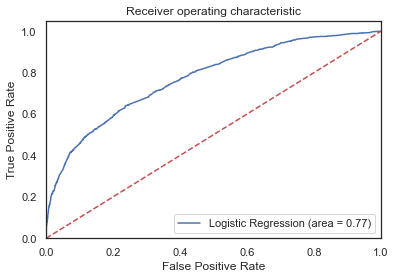

In [60]:
plot_roc_auc(glm_logit_results)

In [61]:
pseudo_r2(glm_logit_results)

Pseudo R2: 0.18126893060716165


In [62]:
adj_count_r2(glm_logit_results)

Adj Count R2: 0.167


# Probit

In [63]:
glm_probit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.probit))
glm_probit_results = glm_probit.fit()
glm_probit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4369
Model Family:                                Binomial   Df Model:                           18
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1923.2
Date:                                Mon, 10 May 2021   Deviance:                       3846.3
Time:                                        21:31:16   Pearson chi2:                 4.43e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.7120      0.081     -8.787      0.000      -0.871      -0.553
Barri_association                                               -0.1510      0.073     -2.082      0.037      -0.293      -0.009
BCN_over_barri_evolution                                         0.1217      0.071      1.718      0.086      -0.017       0.260
BCN_over_barri_future                                            0.1707      0.083      2.062      0.039       0.008       0.333
Age_group_65 YEARS AND OVER                                     -0.6105      0.099     -6.138      0.000      -0.805      -0.416
Age_group_FROM 25 TO 34 YEARS                                   -0.0485      0.090     -0.537      0.591      -0.226       0.129
Age_group_FROM 35 TO 44 YEARS                                   -0.3152      0.091     -3.467      0.001      -0.493      -0.137
Age_group_FROM 45 TO 54 YEARS                                   -0.3527      0.096     -3.676      0.000      -0.541      -0.165
Age_group_FROM 55 TO 64 YEARS                                   -0.4877      0.106     -4.603      0.000      -0.695      -0.280
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.4663      0.078     -6.014      0.000      -0.618      -0.314
Time_living_in_barri_MORE THAN 10 YEARS                         -0.3462      0.063     -5.526      0.000      -0.469      -0.223
Barri_future_IT WILL STAY THE SAME                              -0.1815      0.075     -2.417      0.016      -0.329      -0.034
Barri_future_IT WILL WORSEN                                     -0.1288      0.078     -1.660      0.097      -0.281       0.023
Barri_satisfaction_FAIRLY SATISFIED                              0.7100      0.076      9.300      0.000       0.560       0.860
Barri_satisfaction_NOT SATISFIED                                 0.9487      0.218      4.360      0.000       0.522       1.375
Barri_management_BAD                                             0.0462      0.109      0.425      0.671      -0.167       0.259
Barri_management_NEITHER BAD, NOR GOOD                           0.1690      0.052      3.263      0.001       0.067       0.271
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 0.7301      0.050     14.570      0.000       0.632       0.828
Barri_comparison_ONE OF THE WORST                                1.2853      0.094     13.705      0.000       1.102       1.469
=====================================================================

In [64]:
glm_probit_results.aic

3884.302098546339

In [65]:
glm_probit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-32794.87922212895

In [66]:
classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,3254,140
1.0,685,309


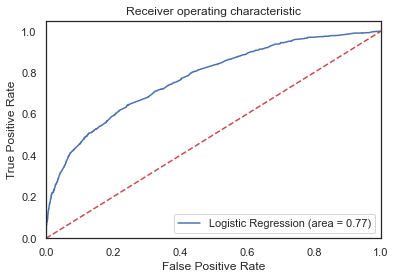

In [67]:
plot_roc_auc(glm_probit_results)

In [68]:
odds_ratios(glm_probit_results)

const                                                           0.490644
Barri_association                                               0.859809
BCN_over_barri_evolution                                        1.129371
BCN_over_barri_future                                           1.186143
Age_group_65 YEARS AND OVER                                     0.543083
Age_group_FROM 25 TO 34 YEARS                                   0.952612
Age_group_FROM 35 TO 44 YEARS                                   0.729630
Age_group_FROM 45 TO 54 YEARS                                   0.702811
Age_group_FROM 55 TO 64 YEARS                                   0.614054
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.627343
Time_living_in_barri_MORE THAN 10 YEARS                         0.707368
Barri_future_IT WILL STAY THE SAME                              0.834007
Barri_future_IT WILL WORSEN                                     0.879124
Barri_satisfaction_FAIRLY SATISFIED                

In [69]:
pseudo_r2(glm_probit_results)

Pseudo R2: 0.18086401389975648


In [70]:
adj_count_r2(glm_probit_results)

Adj Count R2: 0.17


# Scobit

In [71]:
glm_scobit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.cloglog))
glm_scobit_results = glm_scobit.fit()
glm_scobit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4369
Model Family:                                Binomial   Df Model:                           18
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1922.0
Date:                                Mon, 10 May 2021   Deviance:                       3843.9
Time:                                        21:31:21   Pearson chi2:                 4.34e+03
No. Iterations:                                    10                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.3900      0.111    -12.471      0.000      -1.609      -1.172
Barri_association                                               -0.2115      0.110     -1.916      0.055      -0.428       0.005
BCN_over_barri_evolution                                         0.2137      0.096      2.225      0.026       0.025       0.402
BCN_over_barri_future                                            0.1802      0.115      1.563      0.118      -0.046       0.406
Age_group_65 YEARS AND OVER                                     -0.9028      0.142     -6.338      0.000      -1.182      -0.624
Age_group_FROM 25 TO 34 YEARS                                   -0.0613      0.120     -0.513      0.608      -0.296       0.173
Age_group_FROM 35 TO 44 YEARS                                   -0.4608      0.124     -3.731      0.000      -0.703      -0.219
Age_group_FROM 45 TO 54 YEARS                                   -0.4885      0.131     -3.722      0.000      -0.746      -0.231
Age_group_FROM 55 TO 64 YEARS                                   -0.6535      0.148     -4.407      0.000      -0.944      -0.363
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.6611      0.114     -5.788      0.000      -0.885      -0.437
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4800      0.090     -5.346      0.000      -0.656      -0.304
Barri_future_IT WILL STAY THE SAME                              -0.2594      0.110     -2.358      0.018      -0.475      -0.044
Barri_future_IT WILL WORSEN                                     -0.1917      0.107     -1.796      0.073      -0.401       0.018
Barri_satisfaction_FAIRLY SATISFIED                              0.9193      0.093      9.861      0.000       0.737       1.102
Barri_satisfaction_NOT SATISFIED                                 0.9657      0.226      4.276      0.000       0.523       1.408
Barri_management_BAD                                             0.1267      0.147      0.861      0.389      -0.162       0.415
Barri_management_NEITHER BAD, NOR GOOD                           0.2364      0.075      3.168      0.002       0.090       0.383
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.0766      0.073     14.666      0.000       0.933       1.221
Barri_comparison_ONE OF THE WORST                                1.7285      0.109     15.896      0.000       1.515       1.942
=====================================================================

In [72]:
glm_scobit_results.aic

3881.9400162890734

In [73]:
glm_scobit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-32797.24130438621

In [74]:
classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,3261,133
1.0,690,304


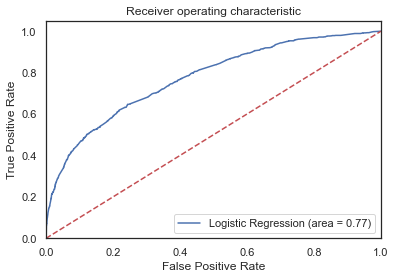

In [75]:
plot_roc_auc(glm_scobit_results)

In [76]:
odds_ratios(glm_scobit_results)

const                                                           0.249065
Barri_association                                               0.809377
BCN_over_barri_evolution                                        1.238208
BCN_over_barri_future                                           1.197471
Age_group_65 YEARS AND OVER                                     0.405417
Age_group_FROM 25 TO 34 YEARS                                   0.940559
Age_group_FROM 35 TO 44 YEARS                                   0.630773
Age_group_FROM 45 TO 54 YEARS                                   0.613550
Age_group_FROM 55 TO 64 YEARS                                   0.520206
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.516286
Time_living_in_barri_MORE THAN 10 YEARS                         0.618787
Barri_future_IT WILL STAY THE SAME                              0.771477
Barri_future_IT WILL WORSEN                                     0.825585
Barri_satisfaction_FAIRLY SATISFIED                

In [77]:
pseudo_r2(glm_scobit_results)

Pseudo R2: 0.1813670598200927


In [78]:
adj_count_r2(glm_scobit_results)

Adj Count R2: 0.172


# Results comparison

In [79]:
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4369
Model Family:                                Binomial   Df Model:                           18
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1922.2
Date:                                Mon, 10 May 2021   Deviance:                       3844.4
Time:                                        21:31:25   Pearson chi2:                 4.39e+03
No. Iterations:                                     5                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.2064      0.140     -8.646      0.000      -1.480      -0.933
Barri_association                                               -0.2608      0.131     -1.984      0.047      -0.518      -0.003
BCN_over_barri_evolution                                         0.2221      0.123      1.802      0.072      -0.020       0.464
BCN_over_barri_future                                            0.2941      0.146      2.009      0.045       0.007       0.581
Age_group_65 YEARS AND OVER                                     -1.0890      0.176     -6.203      0.000      -1.433      -0.745
Age_group_FROM 25 TO 34 YEARS                                   -0.0755      0.154     -0.488      0.625      -0.378       0.227
Age_group_FROM 35 TO 44 YEARS                                   -0.5490      0.157     -3.495      0.000      -0.857      -0.241
Age_group_FROM 45 TO 54 YEARS                                   -0.6161      0.167     -3.699      0.000      -0.943      -0.290
Age_group_FROM 55 TO 64 YEARS                                   -0.8355      0.186     -4.492      0.000      -1.200      -0.471
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.8261      0.139     -5.924      0.000      -1.099      -0.553
Time_living_in_barri_MORE THAN 10 YEARS                         -0.6038      0.111     -5.436      0.000      -0.822      -0.386
Barri_future_IT WILL STAY THE SAME                              -0.3139      0.134     -2.334      0.020      -0.577      -0.050
Barri_future_IT WILL WORSEN                                     -0.2347      0.137     -1.711      0.087      -0.504       0.034
Barri_satisfaction_FAIRLY SATISFIED                              1.1960      0.129      9.252      0.000       0.943       1.449
Barri_satisfaction_NOT SATISFIED                                 1.6470      0.374      4.401      0.000       0.913       2.380
Barri_management_BAD                                             0.0960      0.192      0.500      0.617      -0.280       0.472
Barri_management_NEITHER BAD, NOR GOOD                           0.3092      0.091      3.383      0.001       0.130       0.488
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.2783      0.088     14.514      0.000       1.106       1.451
Barri_comparison_ONE OF THE WORST                                2.1738      0.158     13.719      0.000       1.863       2.484
=====================================================================

In [80]:
glm_probit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4369
Model Family:                                Binomial   Df Model:                           18
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1923.2
Date:                                Mon, 10 May 2021   Deviance:                       3846.3
Time:                                        21:31:25   Pearson chi2:                 4.43e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.7120      0.081     -8.787      0.000      -0.871      -0.553
Barri_association                                               -0.1510      0.073     -2.082      0.037      -0.293      -0.009
BCN_over_barri_evolution                                         0.1217      0.071      1.718      0.086      -0.017       0.260
BCN_over_barri_future                                            0.1707      0.083      2.062      0.039       0.008       0.333
Age_group_65 YEARS AND OVER                                     -0.6105      0.099     -6.138      0.000      -0.805      -0.416
Age_group_FROM 25 TO 34 YEARS                                   -0.0485      0.090     -0.537      0.591      -0.226       0.129
Age_group_FROM 35 TO 44 YEARS                                   -0.3152      0.091     -3.467      0.001      -0.493      -0.137
Age_group_FROM 45 TO 54 YEARS                                   -0.3527      0.096     -3.676      0.000      -0.541      -0.165
Age_group_FROM 55 TO 64 YEARS                                   -0.4877      0.106     -4.603      0.000      -0.695      -0.280
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.4663      0.078     -6.014      0.000      -0.618      -0.314
Time_living_in_barri_MORE THAN 10 YEARS                         -0.3462      0.063     -5.526      0.000      -0.469      -0.223
Barri_future_IT WILL STAY THE SAME                              -0.1815      0.075     -2.417      0.016      -0.329      -0.034
Barri_future_IT WILL WORSEN                                     -0.1288      0.078     -1.660      0.097      -0.281       0.023
Barri_satisfaction_FAIRLY SATISFIED                              0.7100      0.076      9.300      0.000       0.560       0.860
Barri_satisfaction_NOT SATISFIED                                 0.9487      0.218      4.360      0.000       0.522       1.375
Barri_management_BAD                                             0.0462      0.109      0.425      0.671      -0.167       0.259
Barri_management_NEITHER BAD, NOR GOOD                           0.1690      0.052      3.263      0.001       0.067       0.271
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 0.7301      0.050     14.570      0.000       0.632       0.828
Barri_comparison_ONE OF THE WORST                                1.2853      0.094     13.705      0.000       1.102       1.469
=====================================================================

In [81]:
glm_scobit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 4388
Model:                                            GLM   Df Residuals:                     4369
Model Family:                                Binomial   Df Model:                           18
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -1922.0
Date:                                Mon, 10 May 2021   Deviance:                       3843.9
Time:                                        21:31:26   Pearson chi2:                 4.34e+03
No. Iterations:                                    10                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.3900      0.111    -12.471      0.000      -1.609      -1.172
Barri_association                                               -0.2115      0.110     -1.916      0.055      -0.428       0.005
BCN_over_barri_evolution                                         0.2137      0.096      2.225      0.026       0.025       0.402
BCN_over_barri_future                                            0.1802      0.115      1.563      0.118      -0.046       0.406
Age_group_65 YEARS AND OVER                                     -0.9028      0.142     -6.338      0.000      -1.182      -0.624
Age_group_FROM 25 TO 34 YEARS                                   -0.0613      0.120     -0.513      0.608      -0.296       0.173
Age_group_FROM 35 TO 44 YEARS                                   -0.4608      0.124     -3.731      0.000      -0.703      -0.219
Age_group_FROM 45 TO 54 YEARS                                   -0.4885      0.131     -3.722      0.000      -0.746      -0.231
Age_group_FROM 55 TO 64 YEARS                                   -0.6535      0.148     -4.407      0.000      -0.944      -0.363
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.6611      0.114     -5.788      0.000      -0.885      -0.437
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4800      0.090     -5.346      0.000      -0.656      -0.304
Barri_future_IT WILL STAY THE SAME                              -0.2594      0.110     -2.358      0.018      -0.475      -0.044
Barri_future_IT WILL WORSEN                                     -0.1917      0.107     -1.796      0.073      -0.401       0.018
Barri_satisfaction_FAIRLY SATISFIED                              0.9193      0.093      9.861      0.000       0.737       1.102
Barri_satisfaction_NOT SATISFIED                                 0.9657      0.226      4.276      0.000       0.523       1.408
Barri_management_BAD                                             0.1267      0.147      0.861      0.389      -0.162       0.415
Barri_management_NEITHER BAD, NOR GOOD                           0.2364      0.075      3.168      0.002       0.090       0.383
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.0766      0.073     14.666      0.000       0.933       1.221
Barri_comparison_ONE OF THE WORST                                1.7285      0.109     15.896      0.000       1.515       1.942
=====================================================================

In [82]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,3252,142
1.0,686,308


In [83]:
classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,3254,140
1.0,685,309


In [84]:
classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,3261,133
1.0,690,304


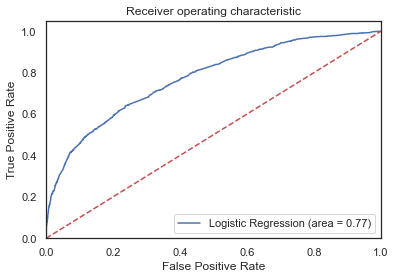

In [85]:
plot_roc_auc(glm_logit_results)

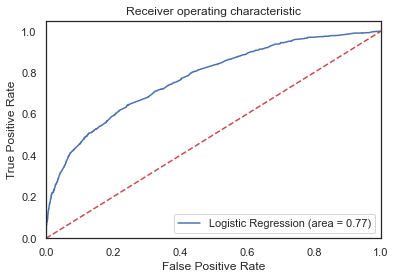

In [86]:
plot_roc_auc(glm_probit_results)

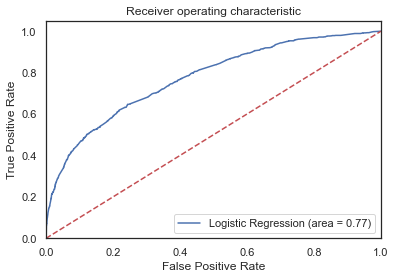

In [87]:
plot_roc_auc(glm_scobit_results)

In [88]:
print("Logit")
pseudo_r2(glm_logit_results)
adj_count_r2(glm_logit_results)

Logit
Pseudo R2: 0.18126893060716165
Adj Count R2: 0.167


In [89]:
print("Probit")
pseudo_r2(glm_probit_results)
adj_count_r2(glm_probit_results)

Probit
Pseudo R2: 0.18086401389975648
Adj Count R2: 0.17


In [90]:
print("Scobit")
pseudo_r2(glm_scobit_results)
adj_count_r2(glm_scobit_results)

Scobit
Pseudo R2: 0.1813670598200927
Adj Count R2: 0.172


In [91]:
print("Logit \n AIC:", glm_logit_results.aic, "BIC:", glm_logit_results.bic)

Logit 
 AIC: 3882.4007878874772 BIC: -32796.78053278781


C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


In [92]:
print("Probit \n AIC:", glm_probit_results.aic, "BIC:", glm_probit_results.bic)

Probit 
 AIC: 3884.302098546339 BIC: -32794.87922212895


In [93]:
print("Scobit \n AIC:", glm_scobit_results.aic, "BIC:", glm_scobit_results.bic)

Scobit 
 AIC: 3881.9400162890734 BIC: -32797.24130438621
